In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio


In [2]:

def g(t, a, t1, t2):
    return np.piecewise(t,
        [t > t2, t <= t2, t < t1],
        [0, a, 0]
    )

def noise(t: np.ndarray, b, c, d):
    return np.random.uniform(-b, b, t.size) + c*np.sin(d*t)

def noisy_signal(t: np.ndarray, a, t1, t2, b, c, d):
    return g(t, a, t1, t2) + noise(t, b, c, d)

## 1.1

In [3]:
def lower_filter(b, threshold, t: np.ndarray, filename=None):

    a, t1, t2 = 1, -.5, .5

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax1, ax2 = ax

    ax1.set_xlabel('$t$', loc='right')
    ax1.axhline(y=1, c='black', linestyle='--', linewidth=.5)
    ax1.axhline(y=0, c='black', linestyle='--', linewidth=.5)

    ax2.set_xlim(-100, 100)


    N = t.size
    T = t2 - t1 + 1

    original_signal = noisy_signal(t, a, t1, t2, b, 0, 0)

    fr = np.fft.fftfreq(N, (T/N))
    original_ft = np.fft.fft(original_signal, N)

    fr = np.fft.fftshift(fr)
    original_ft = np.fft.fftshift(original_ft)

    filtered_ft = np.copy(original_ft)
    filtered_ft[np.where(np.abs(fr) > threshold)] = 0

    ax2.plot(fr, np.abs(np.real(original_ft)), color='red', alpha=.2, label='исходный')
    ax2.plot(fr, np.abs(np.real(filtered_ft)), color='green', linewidth=1, label='фильтрованный')

    filtered_ft = np.fft.ifftshift(filtered_ft)
    filtered_signal = np.fft.ifft(filtered_ft)

    ax1.plot(t, original_signal, color='red', alpha=.2, label='исходный')
    ax1.plot(t, (np.real(filtered_signal)), color='green', label='фильтрованный')

    ax1.text(0.05, 0.95, f"$b={b}$", transform=ax1.transAxes,
             fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    
    ax2.text(0.05, 0.95, f"$\\nu_0={threshold}$", transform=ax2.transAxes,
             fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))


    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right')

    fig.tight_layout()
    if filename is not None:
        fig.savefig(filename, bbox_inches='tight')


In [4]:
N = 2**12*2
t = np.linspace(-1, 1, N)

In [5]:
%mkdir -p ../fig/1/1/

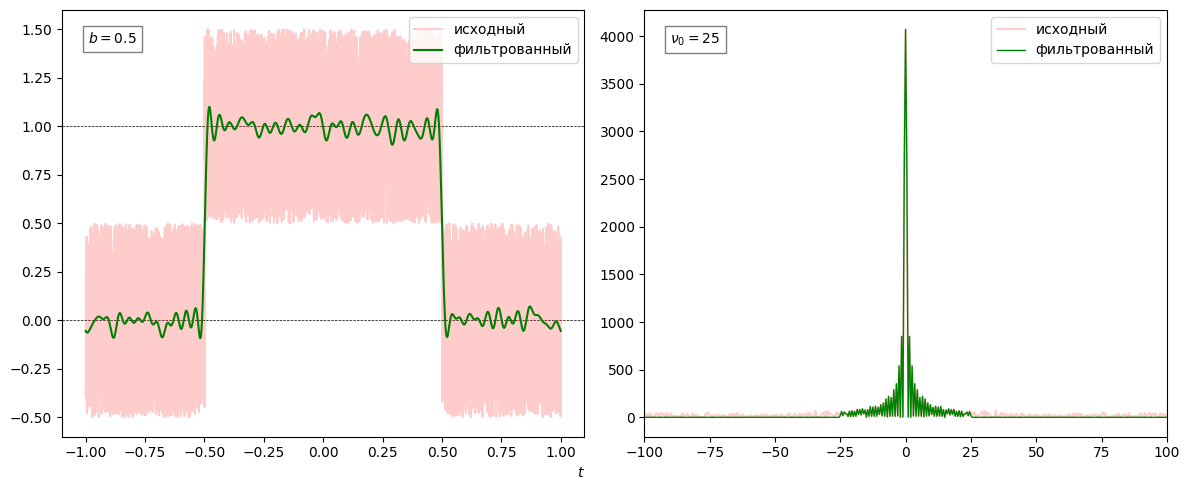

In [6]:
lower_filter(.5, 25, t, "../fig/1/1/1.svg")

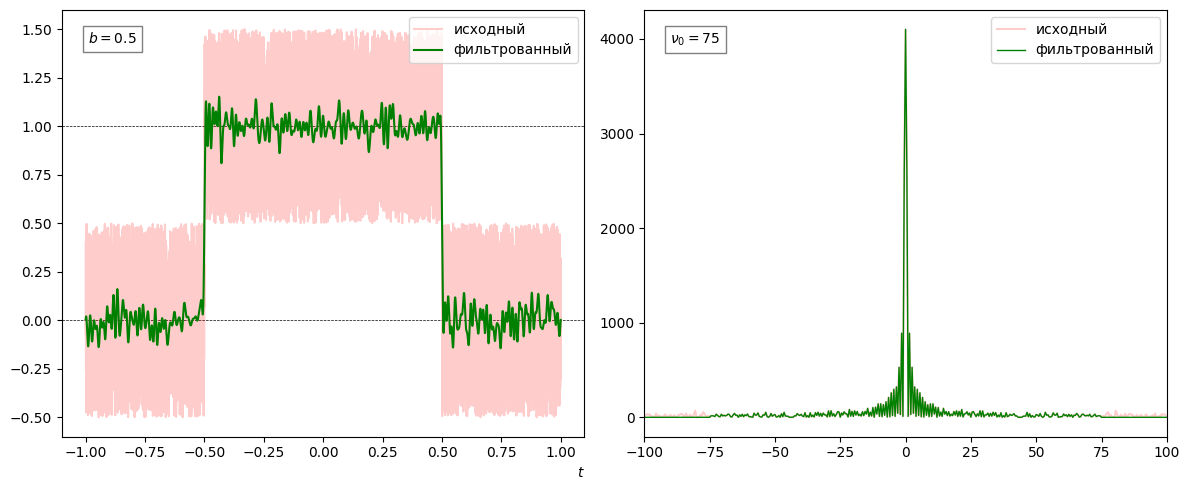

In [7]:
lower_filter(.5, 75, t, "../fig/1/1/2.svg")

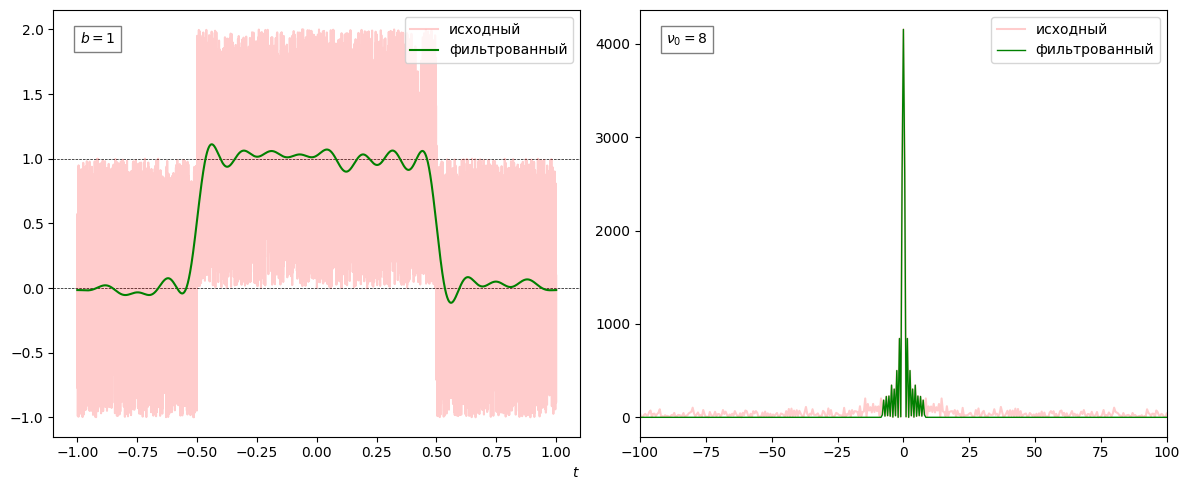

In [8]:
lower_filter(1, 8, t, "../fig/1/1/3.svg")

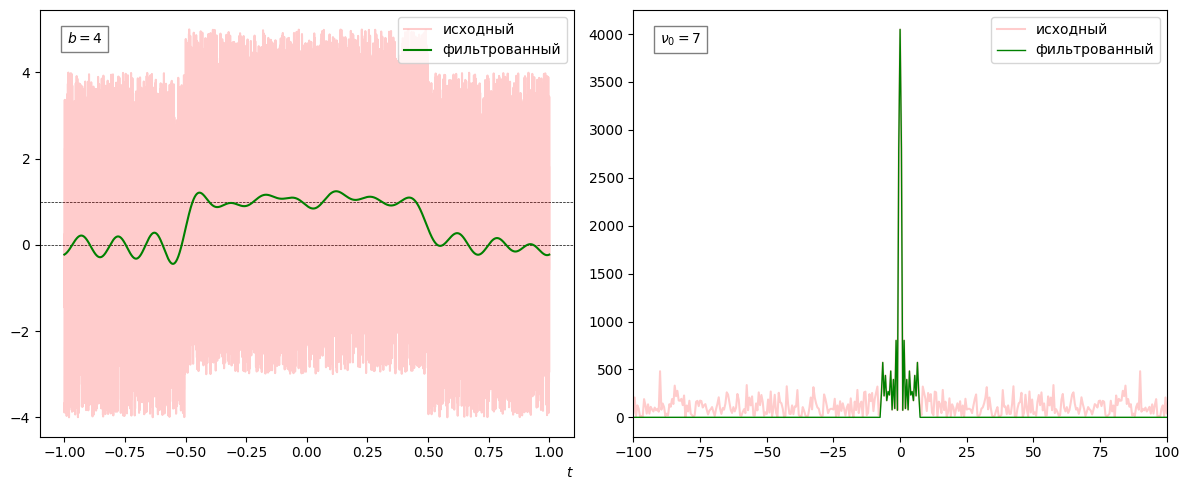

In [9]:
lower_filter(4, 7, t, "../fig/1/1/4.svg")

## Фильтр специфических частот

In [10]:
def band_filter(b, c, d, filter, t: np.ndarray, lim=100, filename=None):

    a, t1, t2 = 1, -.5, .5

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax1, ax2 = ax

    ax1.set_xlabel('$t$', loc='right')
    ax1.axhline(y=1, c='black', linestyle='--', linewidth=.5)
    ax1.axhline(y=0, c='black', linestyle='--', linewidth=.5)

    ax2.set_xlim(-lim,lim)

    N = t.size
    T = t2 - t1 + 1

    original_signal = noisy_signal(t, a, t1, t2, b, c, d)

    fr = np.fft.fftfreq(N, (T/N))
    original_ft = np.fft.fft(original_signal, N)

    fr = np.fft.fftshift(fr)
    original_ft = np.fft.fftshift(original_ft)

    filtered_ft = np.copy(original_ft)
    filter(filtered_ft, fr)
    
    filtered_ft2 = np.fft.ifftshift(filtered_ft)
    filtered_signal = np.fft.ifft(filtered_ft2)
    
    ax2.plot(fr, np.abs(np.real(original_ft)), color='red', alpha=.2, label='исходный')
    ax2.plot(fr, np.abs(np.real(filtered_ft)), color='green', linewidth=1, label='фильтрованный')

    ax1.plot(t, original_signal, color='red', alpha=.2, label='исходный')
    ax1.plot(t, (np.real(filtered_signal)), color='green', label='фильтрованный')

    ax1.text(0.05, 0.95, f"$b={b}$\n$c={c}$\n$\\omega=2\\pi\\cdot{d/2/np.pi:.0f}$", transform=ax1.transAxes,
             fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    
    # ax2.text(0.05, 0.95, f"$\\nu_0={threshold}$", transform=ax2.transAxes,
    #          fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))


    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right')

    fig.tight_layout()
    
    if filename is not None:
        fig.savefig(filename, bbox_inches='tight')


In [11]:
%mkdir -p ../fig/1/2/

### Случай $b=0$

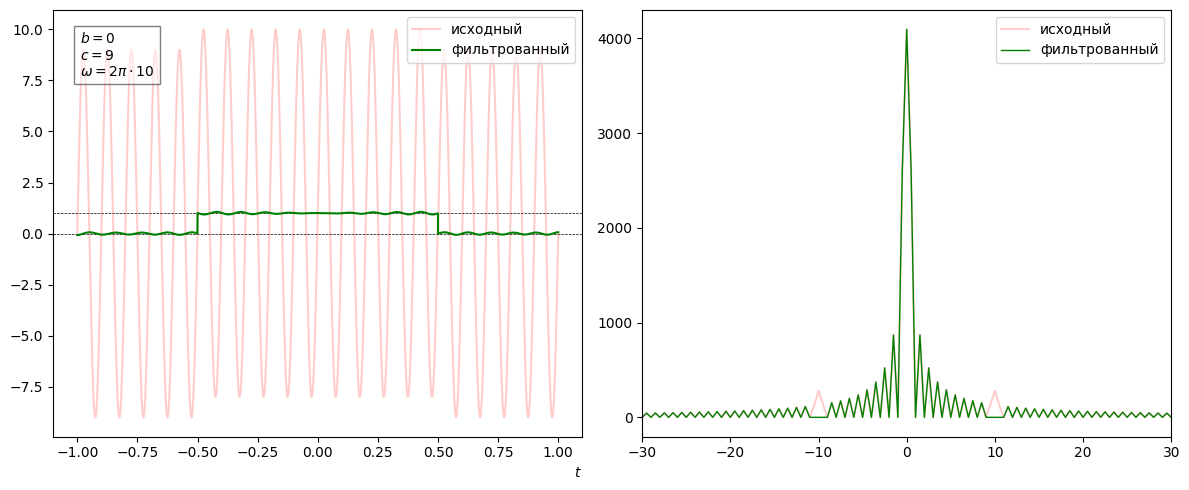

In [12]:
def filt1(ft: np.ndarray, fr: np.ndarray):
    ft[ np.where( np.abs(fr+10) < 1 ) ] = 0
    ft[ np.where( np.abs(fr-10) < 1 ) ] = 0

band_filter(0, 9, 2*np.pi*10, filt1, t, lim=30, filename="../fig/1/2/1.svg")

### Общий случай

#### Вариация $\omega$

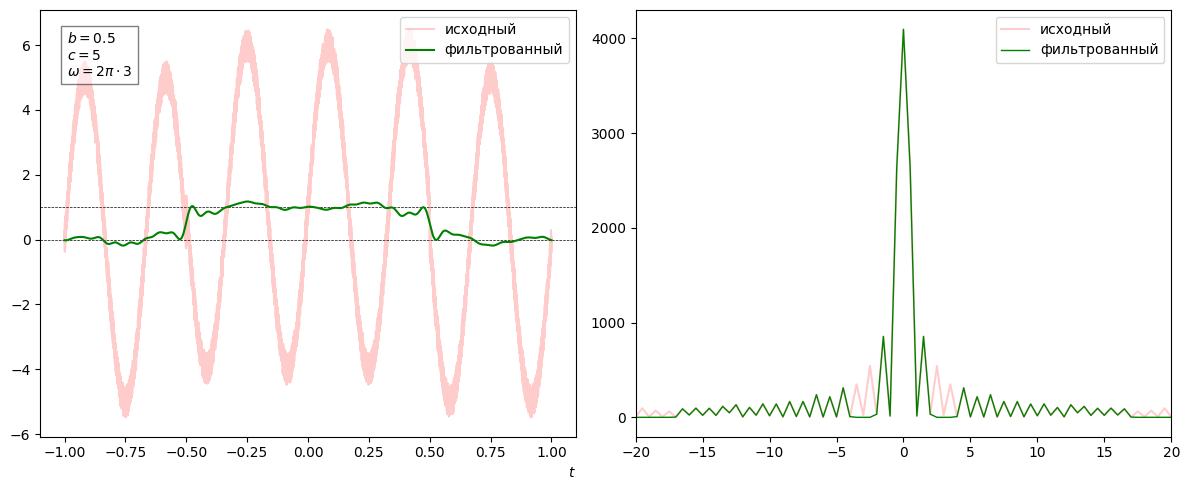

In [13]:
def filt1(ft: np.ndarray, fr: np.ndarray):
    ft[ np.where( np.abs(fr+3) < .6 ) ] = 0
    ft[ np.where( np.abs(fr-3) < .6 ) ] = 0

    ft[ np.where(np.abs(fr)>17) ] = 0
    
    return ft

band_filter(.5, 5, 2*np.pi*3, filt1, t, lim=20, filename="../fig/1/2/2.svg")

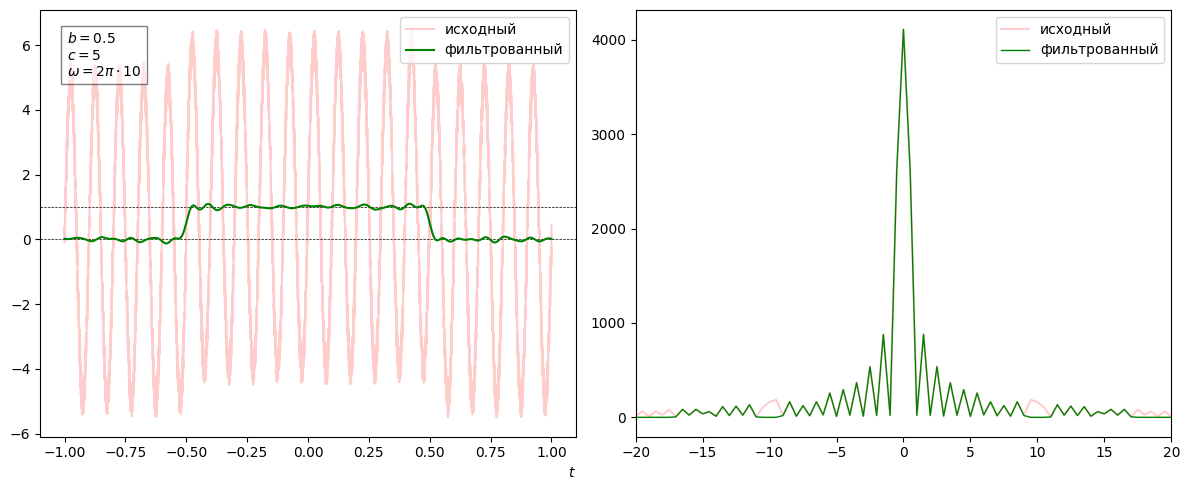

In [14]:
def filt2(ft: np.ndarray, fr: np.ndarray):
    ft[ np.where( np.abs(fr+10) < 1 ) ] = 0
    ft[ np.where( np.abs(fr-10) < 1 ) ] = 0

    ft[ np.where(np.abs(fr)>17) ] = 0

band_filter(0.5, 5, 2*np.pi*10, filt2, t, lim=20, filename="../fig/1/2/3.svg")

#### Вариация $c$

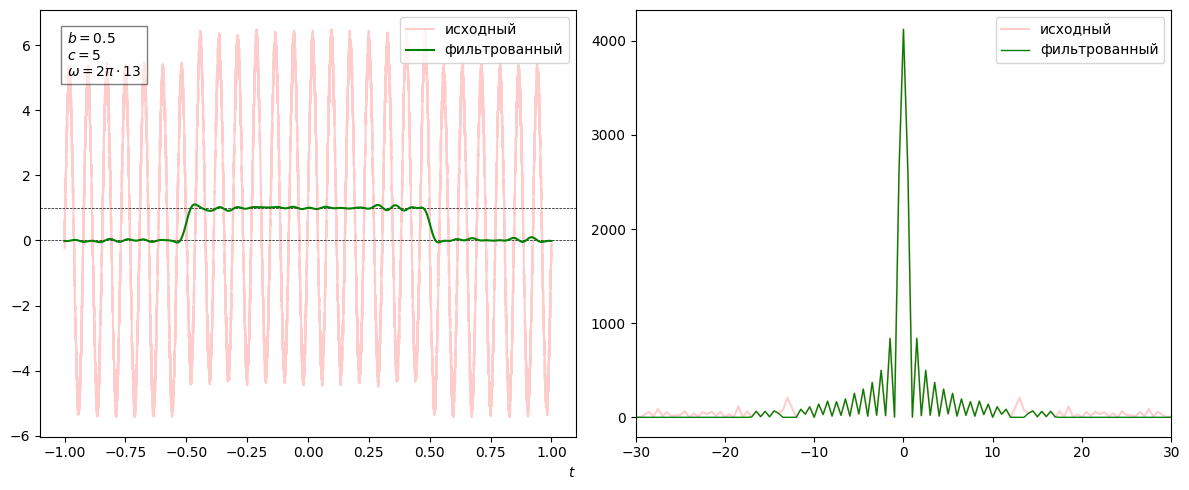

In [15]:
def filt3(ft: np.ndarray, fr: np.ndarray):
    ft[ np.where( np.abs(fr+13) < 1 ) ] = 0
    ft[ np.where( np.abs(fr-13) < 1 ) ] = 0

    ft[ np.where(np.abs(fr)>17) ] = 0
    
band_filter(.5, 5, 2*np.pi*13, filt3, t, lim=30, filename="../fig/1/2/4.svg")

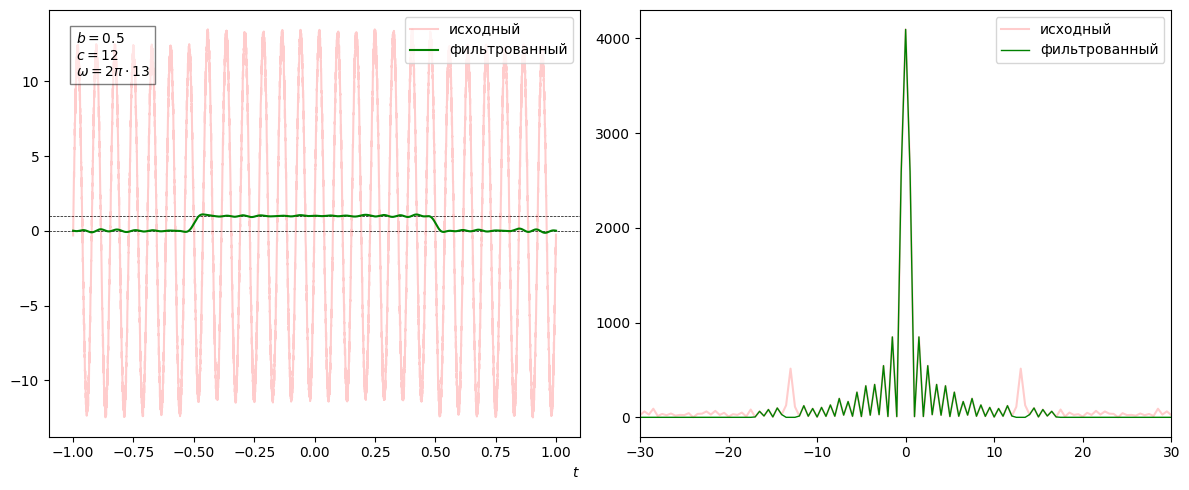

In [16]:
def filt3(ft: np.ndarray, fr: np.ndarray):
    ft[ np.where( np.abs(fr+13) < 1 ) ] = 0
    ft[ np.where( np.abs(fr-13) < 1 ) ] = 0

    ft[ np.where(np.abs(fr)>17) ] = 0
    
band_filter(.5, 12, 2*np.pi*13, filt3, t, lim=30, filename="../fig/1/2/5.svg")

#### Вариация $b$

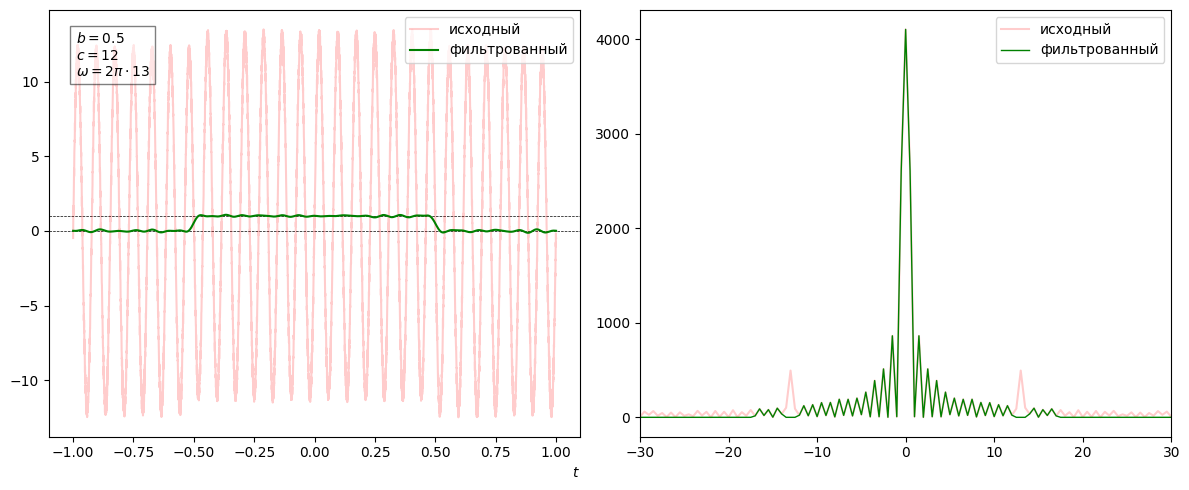

In [17]:
def filt3(ft: np.ndarray, fr: np.ndarray):
    ft[ np.where( np.abs(fr+13) < 1 ) ] = 0
    ft[ np.where( np.abs(fr-13) < 1 ) ] = 0

    ft[ np.where(np.abs(fr)>17) ] = 0
    
band_filter(.5, 12, 2*np.pi*13, filt3, t, lim=30, filename="../fig/1/2/6.svg")

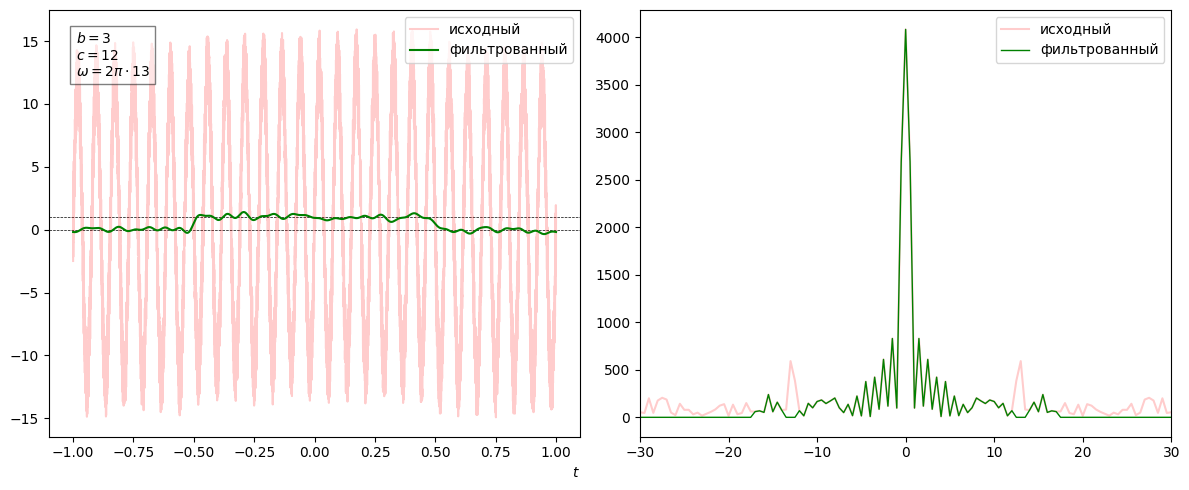

In [18]:
def filt3(ft: np.ndarray, fr: np.ndarray):
    ft[ np.where( np.abs(fr+13) < 1 ) ] = 0
    ft[ np.where( np.abs(fr-13) < 1 ) ] = 0

    ft[ np.where(np.abs(fr)>17) ] = 0
    
band_filter(3, 12, 2*np.pi*13, filt3, t, lim=30, filename="../fig/1/2/7.svg")

## Верхние частоты

In [19]:
%mkdir -p ../fig/1/3

In [20]:
def upper_filter(threshold: float):
    def _filter(ft, fr):
        ft[ np.where(np.abs(fr)<threshold) ] = 0
    return _filter

#### Гармоника убирается фильтром

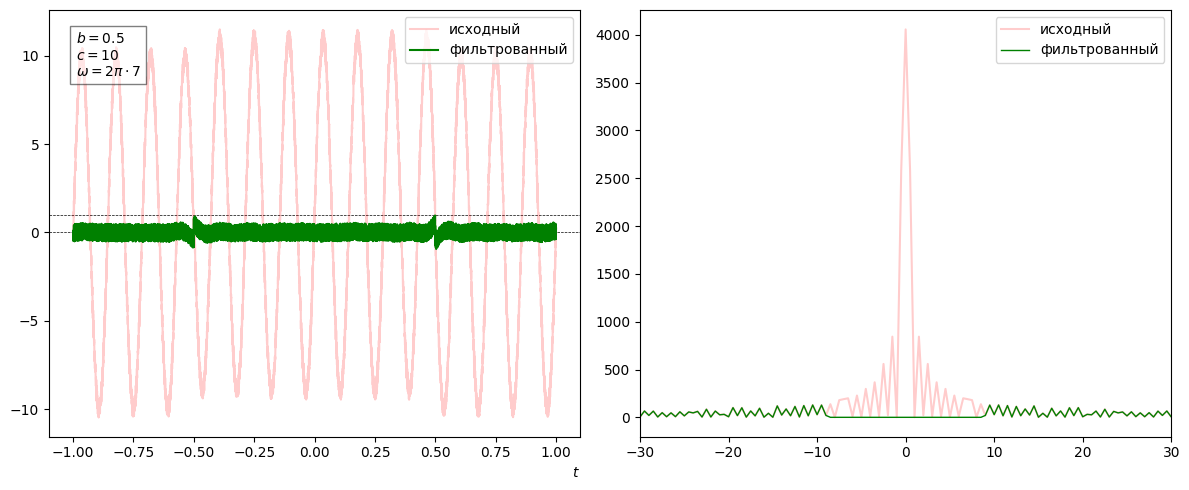

In [21]:
omega = 7
    
band_filter(.5, 10, 2*np.pi*omega, upper_filter(9), t, lim=30, filename="../fig/1/3/1.svg")

#### Гармоника попадает в фильтр

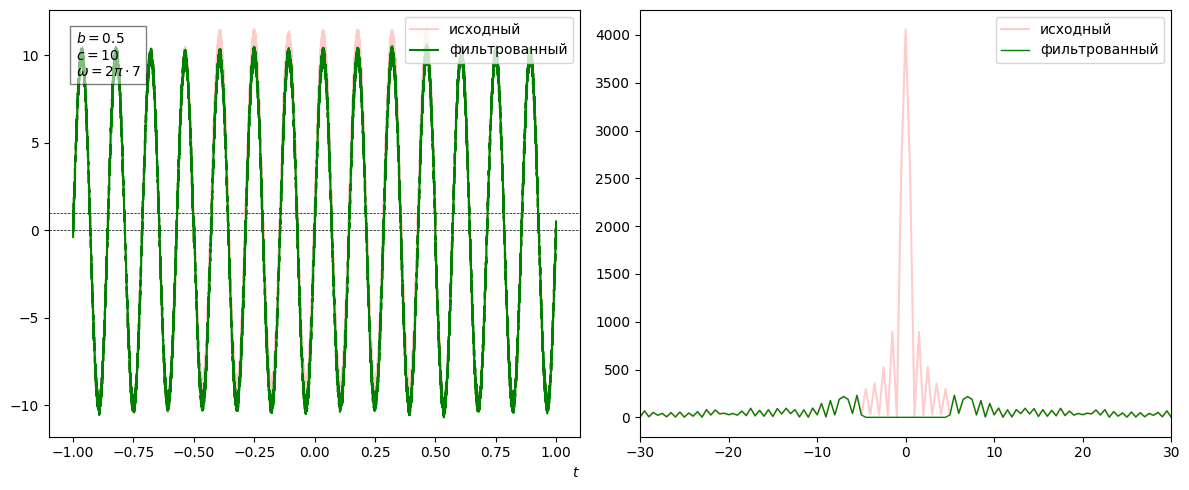

In [22]:
omega = 7
    
band_filter(.5, 10, 2*np.pi*omega, upper_filter(5), t, lim=30, filename="../fig/1/3/2.svg")

#### Часть меандра поппадает в фильтр

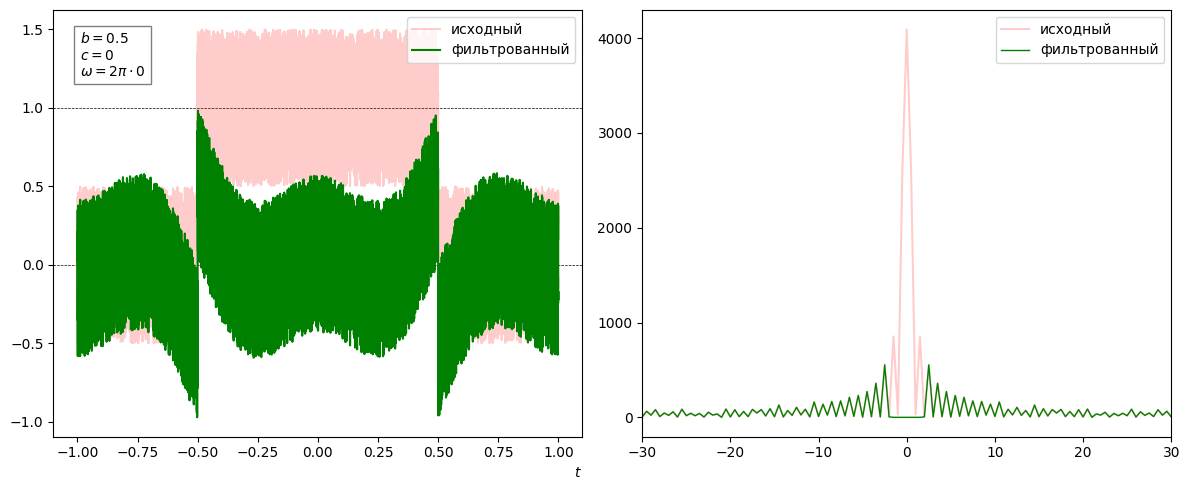

In [23]:
omega = 7
    
band_filter(.5, 0, 0, upper_filter(2), t, lim=30, filename="../fig/1/3/3.svg")

# Задание 2

In [24]:
y, sr = librosa.load('../sup/MUHA.wav')
signal = y

In [25]:
%mkdir -p ../fig/2/

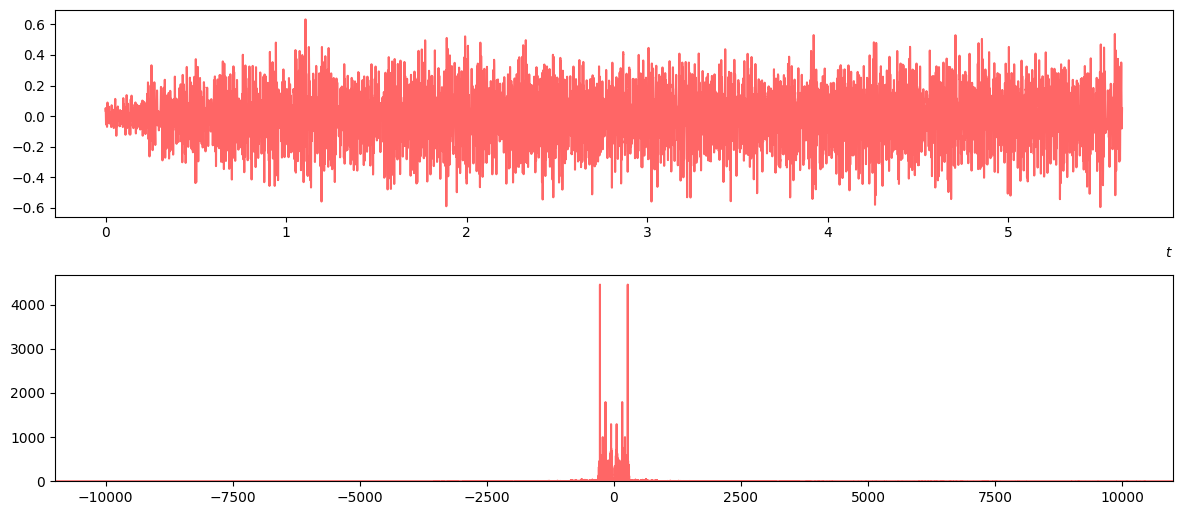

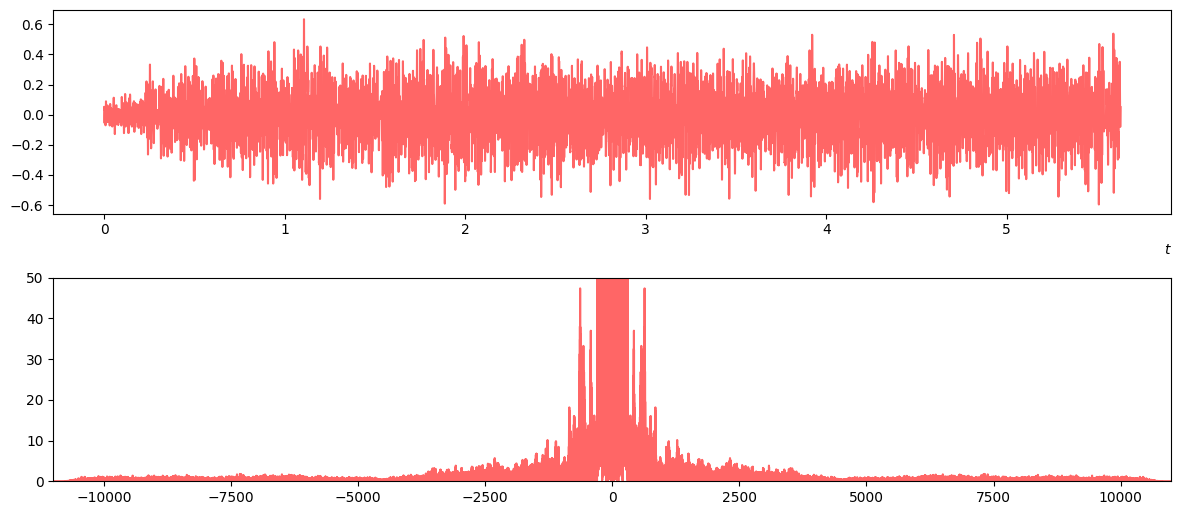

In [26]:
def plot_sound(y: np.ndarray, sr: int, lim=11000, ylim=None, filename=None):
    fig, ax = plt.subplots(2, 1, figsize=(16*.75, 7*.75))
    ax1, ax2 = ax

    ax1.set_xlabel('$t$', loc='right')
    ax2.set_xlim(-lim,lim)

    N = y.size
    T = N / sr

    t = np.linspace(0, T, N)
    
    fr = np.fft.fftfreq(N, (T/N))
    original_ft = np.fft.fft(y, N)

    fr = np.fft.fftshift(fr)
    original_ft = np.fft.fftshift(original_ft)
    
    ax2.plot(fr, np.abs(np.real(original_ft)), color='red', alpha=.6)
    ax1.plot(t, y, color='red', alpha=.6)

    ax2.set_ylim(0, ylim)

    fig.tight_layout()

    if filename is not None:
        fig.savefig(filename, bbox_inches='tight')

plot_sound(y, sr, filename="../fig/2/1.svg")
plot_sound(y, sr, ylim=50, filename="../fig/2/2.svg")


In [27]:
def filter_sound(y: np.ndarray, sr: int, filter_func, 
                 lim=5000, ymax=None, filename=None):
    N = y.size
    T = N / sr
    fr = np.fft.fftfreq(N, (T/N))
    original_ft = np.fft.fft(y, N)

    fr = np.fft.fftshift(fr)
    original_ft = np.fft.fftshift(original_ft)

    filtered_ft = np.copy(original_ft)
    filter_func(filtered_ft, fr)

    filtered_ft2 = np.fft.ifftshift(filtered_ft)
    filtered_signal = np.fft.ifft(filtered_ft2)
    
    fig, ax = plt.subplots(2, 1, figsize=(16*.75, 7*.75))
    ax1, ax2 = ax

    ax1.set_xlabel('$t$', loc='right')
    ax2.set_xlim(-lim,lim)
    if ymax is not None:
        ax2.set_ylim(-1,ymax)


    t = np.linspace(0, T, N)
    
    ax2.plot(fr, np.abs(np.real(original_ft)), color='red', alpha=.6, label='исходный')
    ax2.plot(fr, np.abs(np.real(filtered_ft)), color='green', alpha=.8, label='фильтрованный')
    ax1.plot(t, y, color='red', alpha=.6, label='исходный')
    ax1.plot(t, np.real(filtered_signal), color='green', alpha=.8, label='фильтрованный')

    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right')

    ax2.set_xticks(fr[2075::10000])

    fig.tight_layout()

    if filename is not None:
        fig.savefig(filename, bbox_inches='tight')

    return Audio(np.real(filtered_signal), rate=sr), np.real(filtered_signal)

In [28]:
def add_band(ft, ft2, fr, freq, width):
    ft[ np.where(np.abs(fr - freq) < width)] = ft2[ np.where(np.abs(fr - freq) < width)]
    ft[ np.where(np.abs(fr + freq) < width)] = ft2[ np.where(np.abs(fr + freq) < width)]

def add_band2(ft, ft2, fr, start, stop):
    ft[ np.where(np.logical_and( np.abs(fr) > start, np.abs(fr) < stop))]


### Применим Фильтр высоких частот

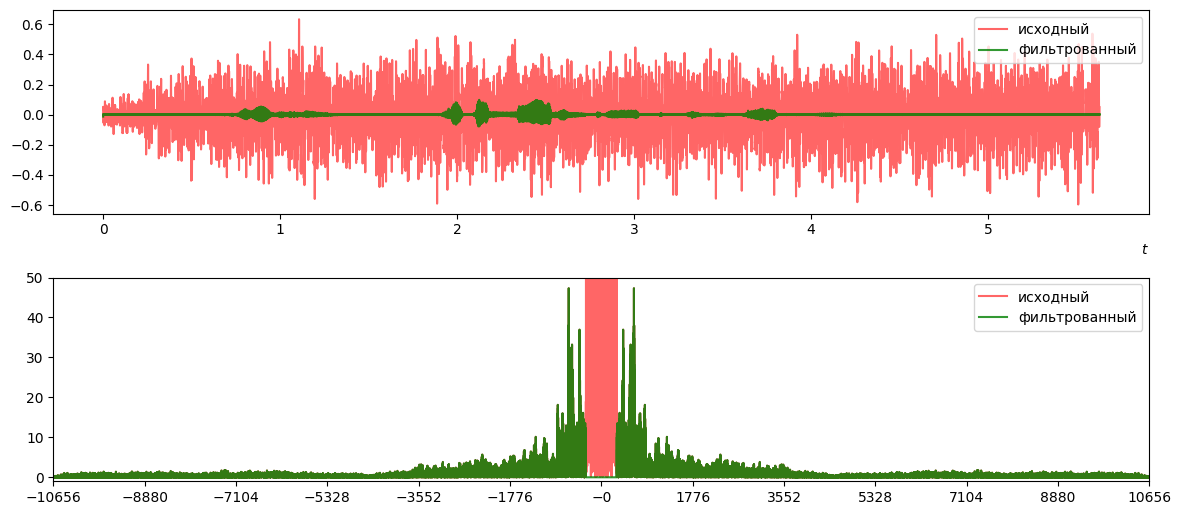

In [29]:
def high_fr_filt(threshold: float):
    def _low_fr_filt(ft, fr):
        ft[ np.where(np.abs(fr) <  threshold) ] = 0
    return _low_fr_filt

sound, signal2 = filter_sound(signal, sr, high_fr_filt(300), lim=5000, ymax=50, filename="../fig/2/3.svg")
sound

### Применим фильтр специфических частот

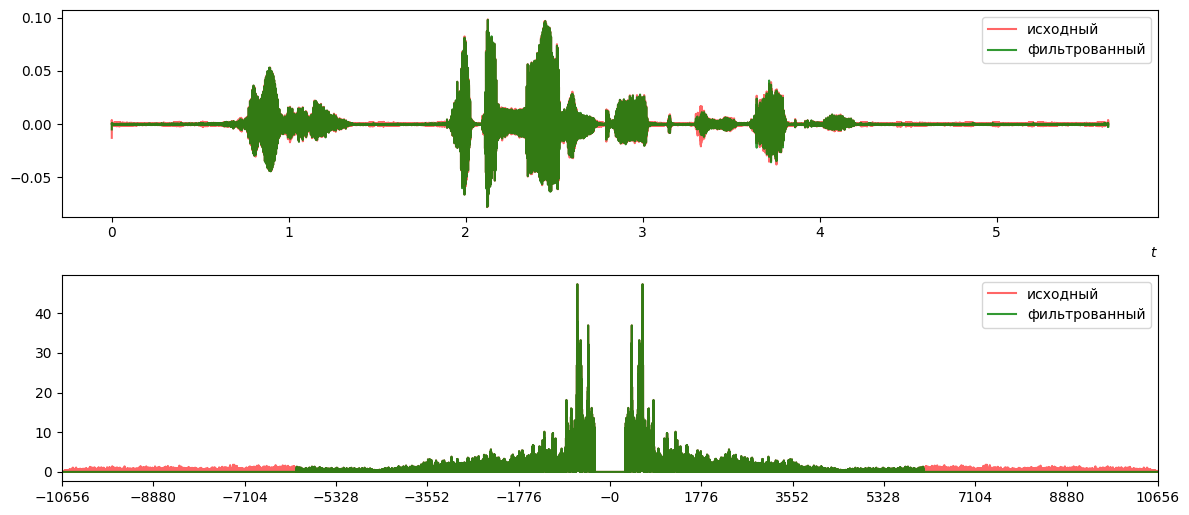

In [30]:
def band_fr_filt(start: float, stop: float):
    def _low_fr_filt(ft, fr):
        ft[ np.where( np.logical_and( np.abs(fr) > start, np.abs(fr) < stop ) ) ] = 0
    return _low_fr_filt

sound, signal3 = filter_sound(signal2, sr, band_fr_filt(6100, 11000), lim=5000, filename="../fig/2/4.svg")
sound

### Конечный фильтрованный сигнал

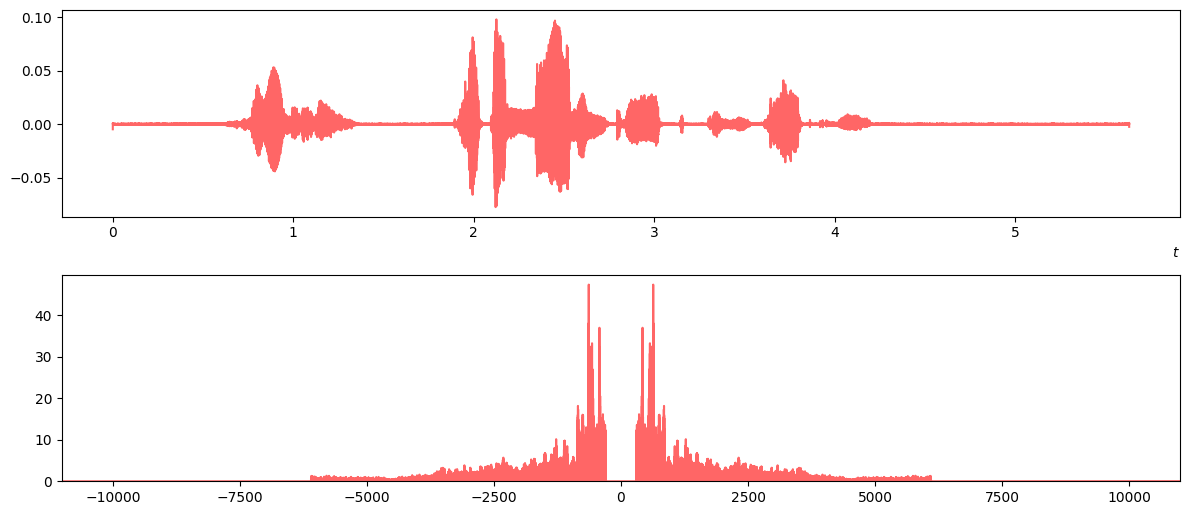

In [31]:
plot_sound(signal3, sr)
sound

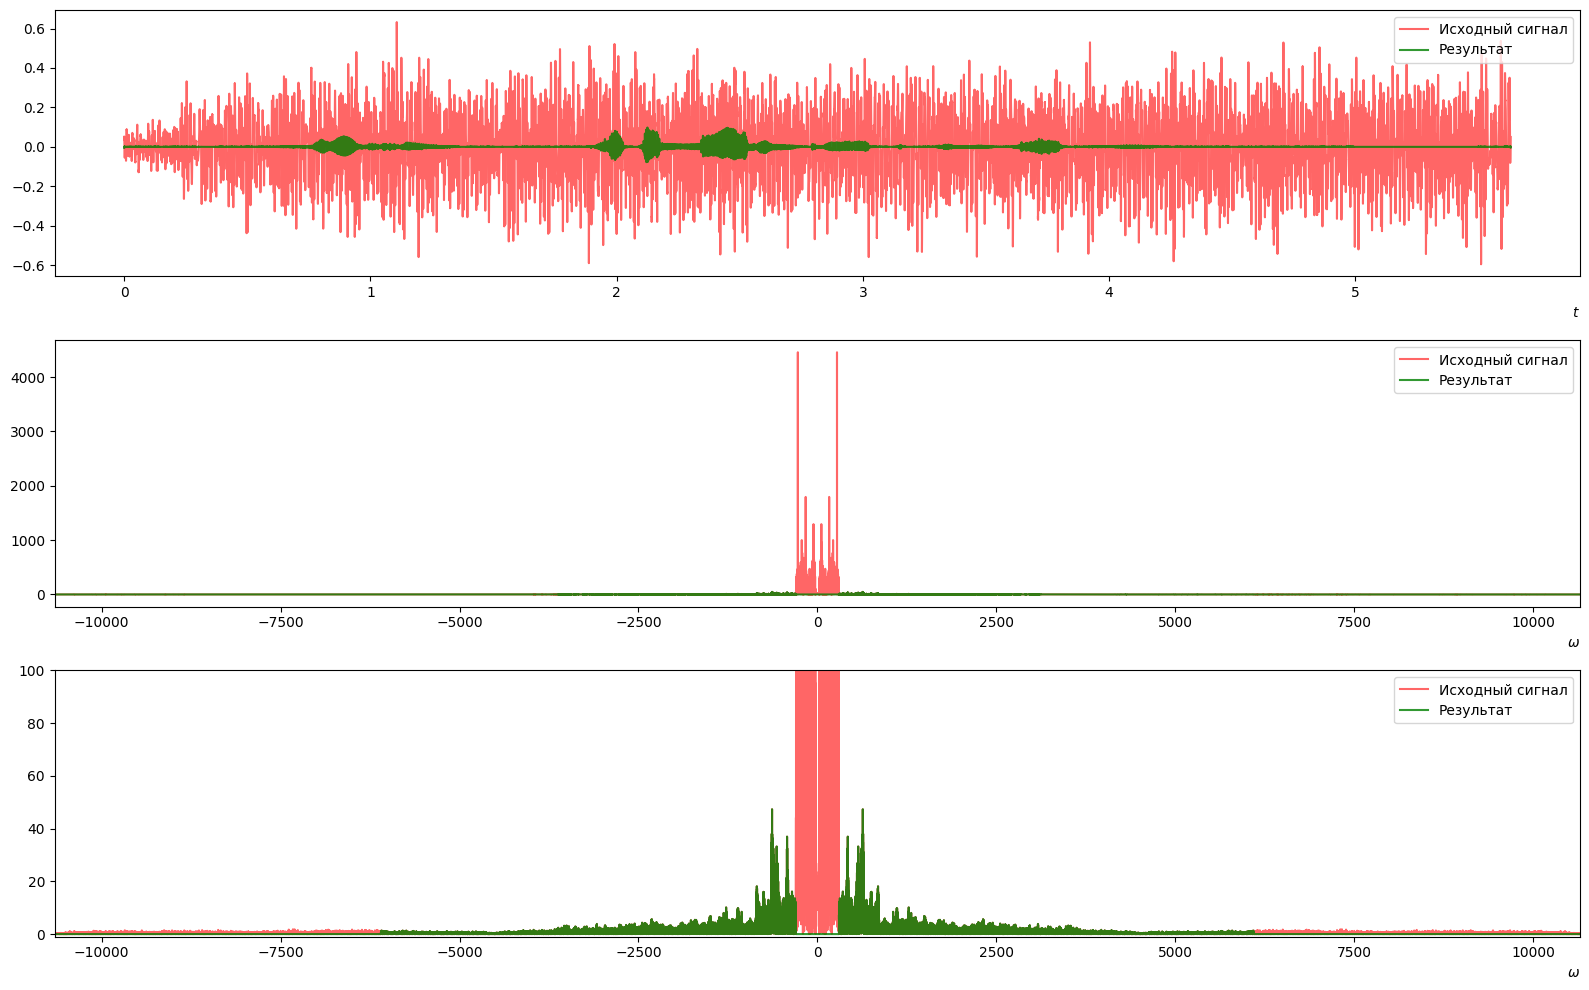

In [32]:
def compare_signals(original, filtered, sr, lim=10655, filename=None):
    fig, ax = plt.subplots(3, 1, figsize=(16, 10))
    
    N = original.size
    T = N / sr
    t = np.linspace(0, T, N)
    
    ax[0].plot(t, original, color='red', alpha=0.6, label='Исходный сигнал')
    ax[0].plot(t, filtered, color='green', alpha=0.8, label='Результат')
    ax[0].set_xlabel('$t$', loc='right')
    ax[0].legend(loc='upper right')
    
    fr_orig = np.fft.fftfreq(N, (T/N))
    orig_ft = np.fft.fft(original, N)
    fr_orig = np.fft.fftshift(fr_orig)
    orig_ft = np.fft.fftshift(orig_ft)
    
    fr_filt = np.fft.fftfreq(N, (T/N))
    filt_ft = np.fft.fft(filtered, N)
    fr_filt = np.fft.fftshift(fr_filt)
    filt_ft = np.fft.fftshift(filt_ft)
    
    ax[1].plot(fr_orig, np.abs(np.real(orig_ft)), color='red', alpha=0.6, label='Исходный сигнал')
    ax[1].plot(fr_filt, np.abs(np.real(filt_ft)), color='green', alpha=0.8, label='Результат')
    ax[1].set_xlim(-lim, lim)
    ax[1].legend(loc='upper right')
    ax[1].set_xlabel('$\\omega$', loc='right')
    
    ax[2].plot(fr_orig, np.abs(np.real(orig_ft)), color='red', alpha=0.6, label='Исходный сигнал')
    ax[2].plot(fr_filt, np.abs(np.real(filt_ft)), color='green', alpha=0.8, label='Результат')
    ax[2].set_xlim(-lim, lim)
    ax[2].set_ylim(-1, 100)
    ax[2].legend(loc='upper right')
    ax[2].set_xlabel('$\\omega$', loc='right')
    
    fig.tight_layout()

    if filename is not None:
        fig.savefig(filename, bbox_inches='tight')
    
# Compare original signal y with final filtered signal signal3
compare_signals(y, signal3, sr, filename="../fig/2/5.svg")
